In [130]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [131]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [132]:
import yfinance as yf

# Define the ticker symbol for Ethereum in USD
ticker = 'ETH-USD'

# Download historical data (daily interval) for the specified period
dataset = yf.download(ticker, start='2021-01-01', end='2024-10-20', interval='1d')

# Show the first few rows of the data
print(dataset.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High         Low  \
Ticker                         ETH-USD      ETH-USD      ETH-USD     ETH-USD   
Date                                                                           
2021-01-01 00:00:00+00:00   730.367554   730.367554   749.201843  719.792236   
2021-01-02 00:00:00+00:00   774.534973   774.534973   786.798462  718.109497   
2021-01-03 00:00:00+00:00   975.507690   975.507690  1006.565002  771.561646   
2021-01-04 00:00:00+00:00  1040.233032  1040.233032  1153.189209  912.305359   
2021-01-05 00:00:00+00:00  1100.006104  1100.006104  1129.371460  986.811279   

Price                             Open       Volume  
Ticker                         ETH-USD      ETH-USD  
Date                                                 
2021-01-01 00:00:00+00:00   737.708374  13652004358  
2021-01-02 00:00:00+00:00   730.402649  19740771179  
2021-01-03 00:00:00+00:00   774.511841  45200463368  
2021-01-04 00:00:00+00:00   977.058

In [133]:
dataset.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321
2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652
2024-10-19 00:00:00+00:00,2648.656982,2648.656982,2661.872803,2631.656982,2641.488281,8557834553


In [134]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)
dataset

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2021-01-01 00:00:00+00:00,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358
1,2021-01-02 00:00:00+00:00,774.534973,774.534973,786.798462,718.109497,730.402649,19740771179
2,2021-01-03 00:00:00+00:00,975.507690,975.507690,1006.565002,771.561646,774.511841,45200463368
3,2021-01-04 00:00:00+00:00,1040.233032,1040.233032,1153.189209,912.305359,977.058838,56945985763
4,2021-01-05 00:00:00+00:00,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,41535932781
...,...,...,...,...,...,...,...
1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321


In [135]:
# Flatten multi-level columns
dataset.columns = ['_'.join(col).strip() for col in dataset.columns.values]


In [136]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)


In [137]:
# Save to CSV
dataset.to_csv('eth_cleaned_data.csv', index=False)


In [138]:
# dataset.drop(columns=['level_0', 'index', 'index_'], inplace=True)

In [139]:
dataset.shape

(1388, 8)

In [140]:
dataset.describe()

,index,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1.388000e+03
mean,693.500000,2357.258498,2357.258498,2418.735090,2287.302460,2356.150781,1.652100e+10
std,400.825398,866.104041,866.104041,891.626699,838.805104,867.706284,1.066940e+10
min,0.000000,730.367554,730.367554,749.201843,718.109497,730.402649,2.081626e+09
25%,346.750000,1660.668304,1660.668304,1692.987244,1629.542450,1660.128937,8.902652e+09
50%,693.500000,2141.445190,2141.445190,2195.717285,2068.025757,2139.935547,1.465121e+10
75%,1040.250000,3022.661499,3022.661499,3123.996277,2943.689880,3022.570374,2.081377e+10
max,1387.000000,4812.087402,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


In [141]:
print(dataset.isnull().sum())

index                0
Date_                0
Adj Close_ETH-USD    0
Close_ETH-USD        0
High_ETH-USD         0
Low_ETH-USD          0
Open_ETH-USD         0
Volume_ETH-USD       0
dtype: int64


In [142]:
dataset

,index,Date_,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
0,0,2021-01-01 00:00:00+00:00,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358
1,1,2021-01-02 00:00:00+00:00,774.534973,774.534973,786.798462,718.109497,730.402649,19740771179
2,2,2021-01-03 00:00:00+00:00,975.507690,975.507690,1006.565002,771.561646,774.511841,45200463368
3,3,2021-01-04 00:00:00+00:00,1040.233032,1040.233032,1153.189209,912.305359,977.058838,56945985763
4,4,2021-01-05 00:00:00+00:00,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,41535932781
...,...,...,...,...,...,...,...,...
1383,1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
1384,1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
1385,1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321
1386,1386,2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652


In [143]:
dataset.columns = dataset.columns.str.replace('_', '', regex=False)
dataset.columns = dataset.columns.str.replace('-', '', regex=False)
dataset.columns = dataset.columns.str.replace('ETHUSD', '', regex=False)

# **Preprocessing the data** 

In [144]:
# Create short simple moving average over a short 10-day-window
dataset['short_mvg'] = dataset['Close'].rolling(window=10, min_periods=1, center=False).mean()

# Create long simple moving average over a long 60-day-window
dataset['long_mvg'] = dataset['Close'].rolling(window=60, min_periods=1, center=False).mean()

# Create the signals
dataset['signal'] = np.where(dataset['short_mvg'] > dataset['long_mvg'], 1.0, 0.0)

In [145]:
dataset['signal'].value_counts()

signal
1.0    723
0.0    665
Name: count, dtype: int64

In [146]:
# making the exponential moving average
# first making the function to calculate the exponential MA of the Close column & then convert into a series

def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,index,Date,Adj Close,Close,High,Low,Open,Volume,short_mvg,long_mvg,signal,EMA10,EMA30,EMA200
1383,1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,2466.937207,2498.116113,0.0,2501.555549,2494.187525,2806.442758
1384,1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,2484.051636,2498.058700,0.0,2521.473095,2501.730397,2804.499068
1385,1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,2502.299316,2497.907304,1.0,2536.527703,2508.346077,2802.506771
1386,1386,2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,2522.470459,2497.978068,1.0,2555.623074,2516.940024,2800.905232
1387,1387,2024-10-19 00:00:00+00:00,2648.656982,2648.656982,2661.872803,2631.656982,2641.488281,8557834553,2550.507812,2499.237236,1.0,2572.538330,2525.437892,2799.390323


In [147]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [148]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [149]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [150]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [151]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [152]:
dataset

,index,Date,Adj Close,Close,High,Low,Open,Volume,short_mvg,long_mvg,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
0,0,2021-01-01 00:00:00+00:00,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358,730.367554,730.367554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-01-02 00:00:00+00:00,774.534973,774.534973,786.798462,718.109497,730.402649,19740771179,752.451263,752.451263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-01-03 00:00:00+00:00,975.507690,975.507690,1006.565002,771.561646,774.511841,45200463368,826.803406,826.803406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-01-04 00:00:00+00:00,1040.233032,1040.233032,1153.189209,912.305359,977.058838,56945985763,880.160812,880.160812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021-01-05 00:00:00+00:00,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,41535932781,924.129871,924.129871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,1383,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,2466.937207,2498.116113,...,49.658666,77.729666,80.881804,74.271108,66.157097,26.119565,24.040213,2466.937207,2501.511523,3040.255540
1384,1384,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,2484.051636,2498.058700,...,49.679681,79.159136,83.155429,74.806814,76.057337,26.394014,26.623038,2484.051636,2512.038802,3035.771328
1385,1385,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,2502.299316,2497.907304,...,49.651680,77.237651,78.042151,72.453640,73.843854,26.025101,26.179560,2502.299316,2520.790991,3030.553413
1386,1386,2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,2522.470459,2497.978068,...,49.806897,87.727434,81.374740,79.254886,75.505113,28.039072,26.819396,2522.470459,2529.851766,3026.236024


In [153]:
dataset = dataset.dropna(axis=0)

In [154]:
# Make sure Date is the index before plotting
dataset.set_index('Date', inplace=True)

In [155]:
dataset.drop(columns="index")

,Adj Close,Close,High,Low,Open,Volume,short_mvg,long_mvg,signal,EMA10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-21 00:00:00+00:00,1990.970825,1990.970825,2025.680420,1759.023315,1786.276245,21253359756,1915.285046,2271.399591,0.0,1934.591093,...,53.099405,60.342053,25.775046,40.704006,22.646504,33.959367,31.155545,1915.285046,2043.667094,2084.486082
2021-07-22 00:00:00+00:00,2025.202759,2025.202759,2044.116455,1954.297852,1994.822876,17495480331,1914.133215,2269.993306,0.0,1951.065942,...,53.178948,94.127379,56.332213,44.670719,32.284406,32.257473,31.853935,1914.133215,2048.675517,2089.734557
2021-07-23 00:00:00+00:00,2124.776611,2124.776611,2129.441162,2000.436279,2025.105713,16200392492,1932.602478,2261.346399,0.0,1982.649700,...,53.409947,98.855017,84.441483,59.223747,48.199491,34.905575,33.707471,1932.602478,2053.176860,2095.157275
2021-07-24 00:00:00+00:00,2189.218750,2189.218750,2197.649414,2107.323486,2123.961182,16057446601,1952.091223,2252.722896,0.0,2020.207709,...,53.558977,98.227357,97.069918,68.642166,57.512211,36.780295,34.647781,1952.091223,2059.868941,2100.603339
2021-07-25 00:00:00+00:00,2191.373779,2191.373779,2194.438232,2108.829834,2187.145508,14566483636,1980.111035,2241.100814,0.0,2051.328813,...,53.563969,98.680477,98.587617,68.957130,65.607681,36.842988,36.176286,1980.111035,2072.474158,2105.524647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,2466.937207,2498.116113,0.0,2501.555549,...,49.658666,77.729666,80.881804,74.271108,66.157097,26.119565,24.040213,2466.937207,2501.511523,3040.255540
2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,2484.051636,2498.058700,0.0,2521.473095,...,49.679681,79.159136,83.155429,74.806814,76.057337,26.394014,26.623038,2484.051636,2512.038802,3035.771328
2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,2502.299316,2497.907304,1.0,2536.527703,...,49.651680,77.237651,78.042151,72.453640,73.843854,26.025101,26.179560,2502.299316,2520.790991,3030.553413


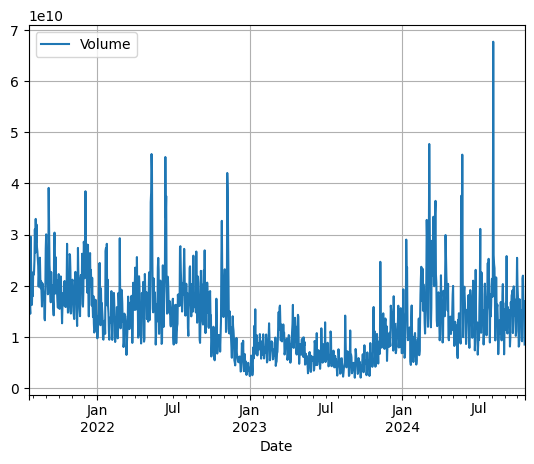

In [156]:
# Plot with Date on the x-axis
dataset[['Volume']].plot(grid=True)
plt.show()

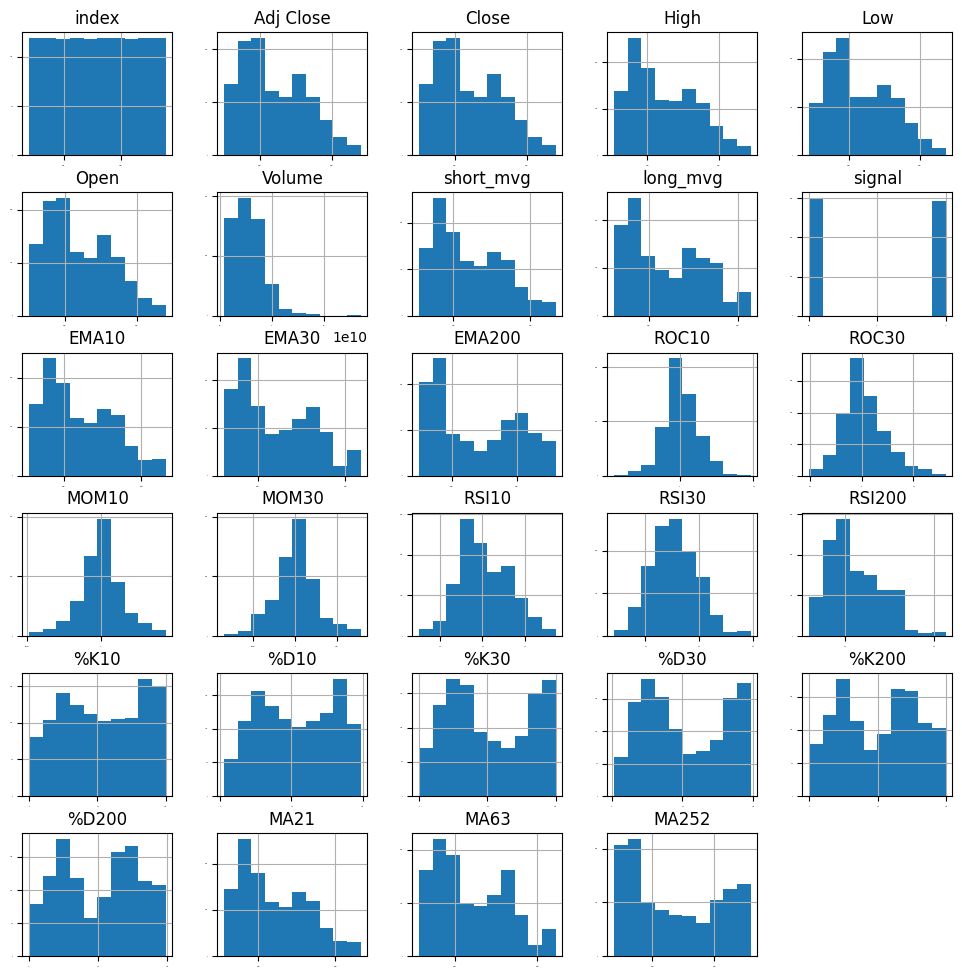

In [157]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

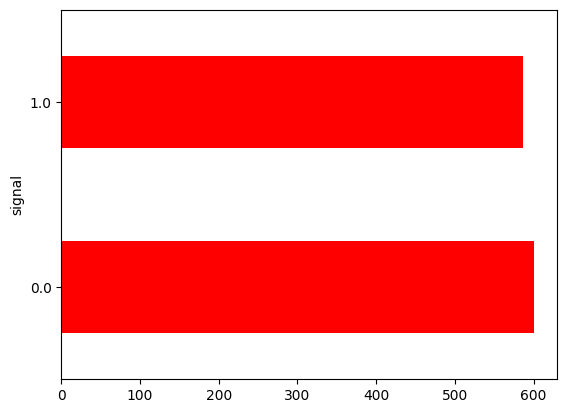

In [158]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

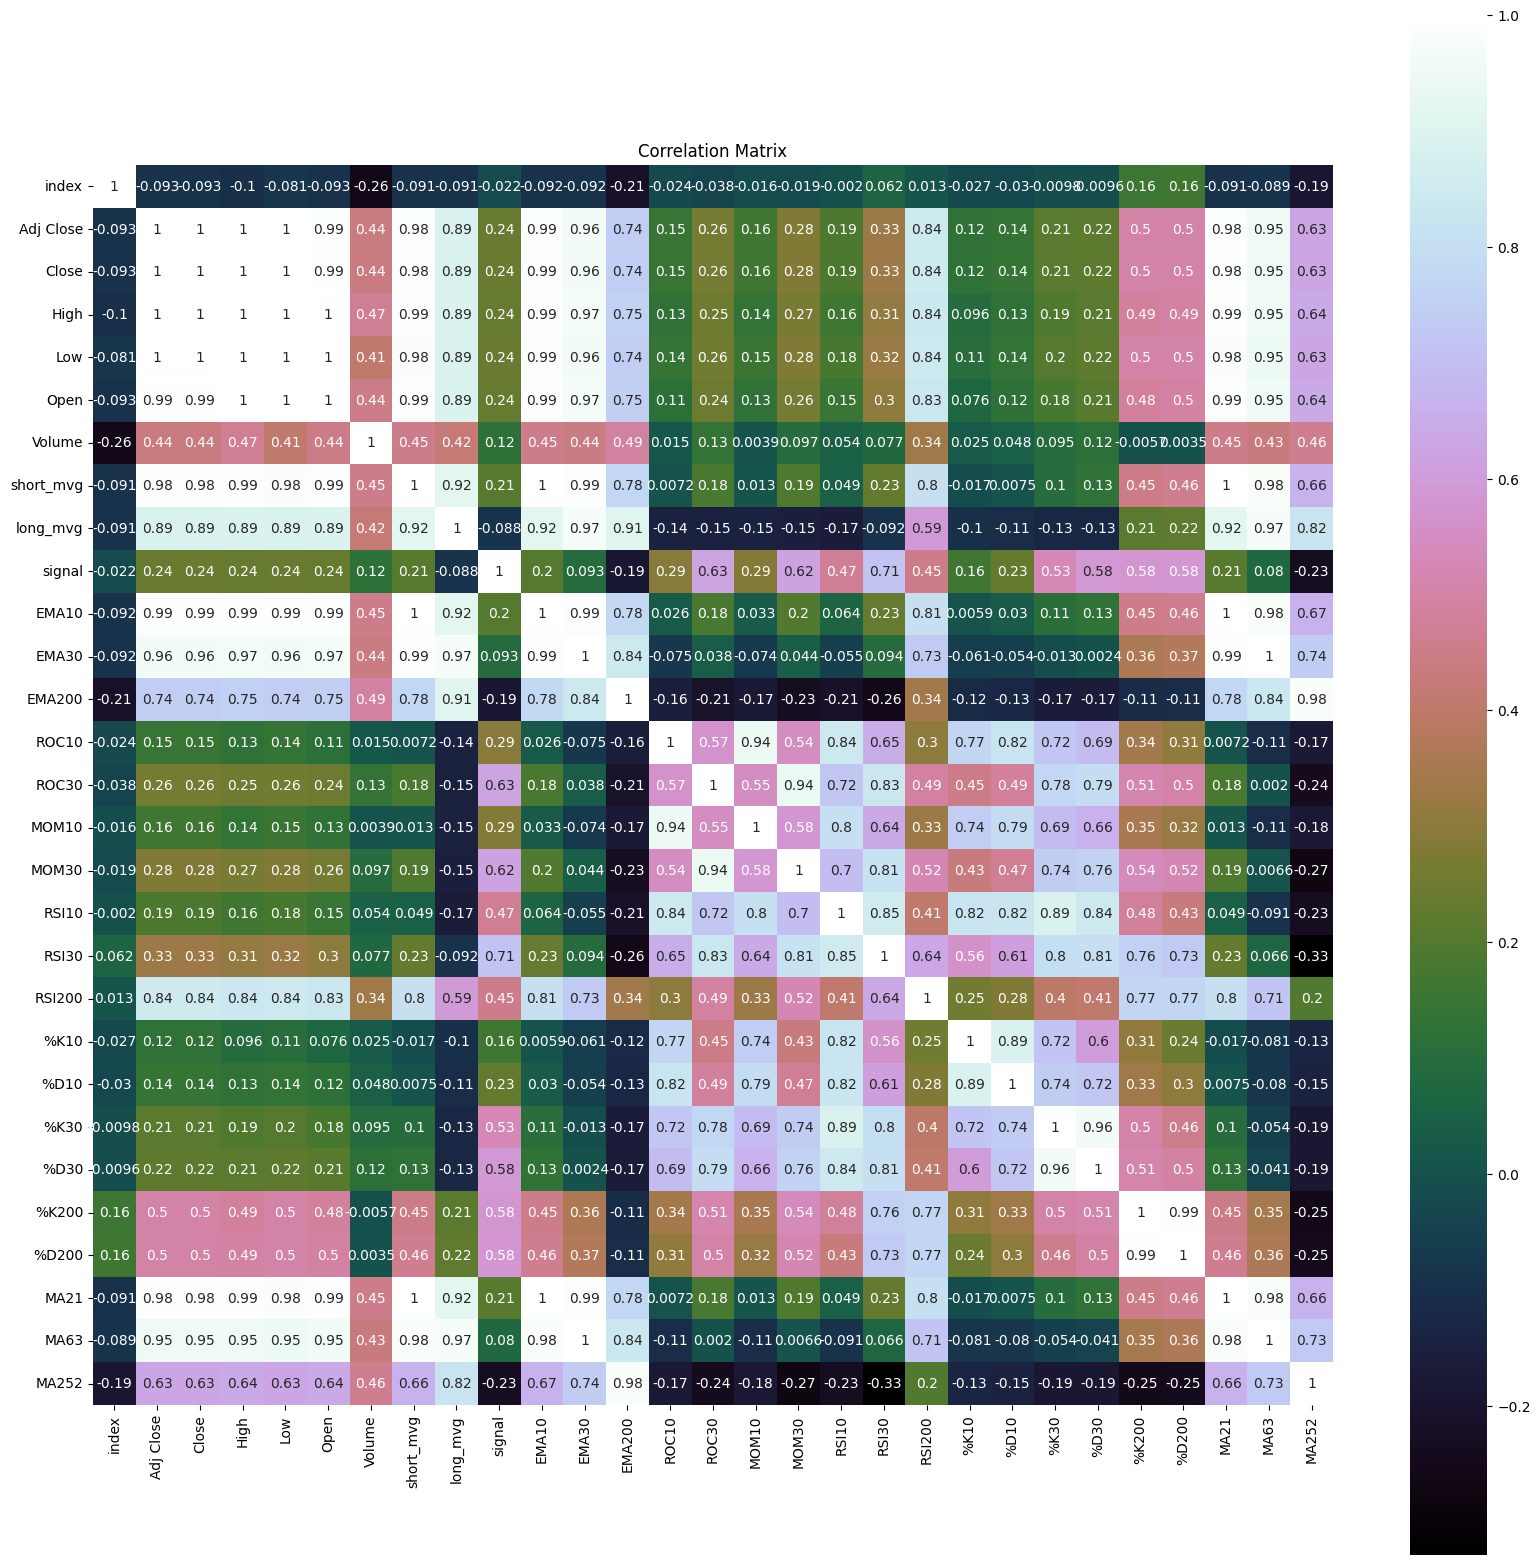

In [159]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

# Models and algorithms

## TRain test split

In [160]:
# split out validation dataset for the end
subset_dataset= dataset.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, dataset.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [161]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_validation.shape[0])


Training set size: 949
Validation set size: 238


## Compare algorithms

In [162]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Ensable Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [163]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'

In [164]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.501613 (0.050833)
LDA: 0.929462 (0.030504)
KNN: 0.554311 (0.051003)
CART: 0.891445 (0.030243)
NB: 0.520504 (0.036826)
NN: 0.497335 (0.050789)
AB: 0.951501 (0.027198)
GBM: 0.936797 (0.029367)
RF: 0.942049 (0.020097)


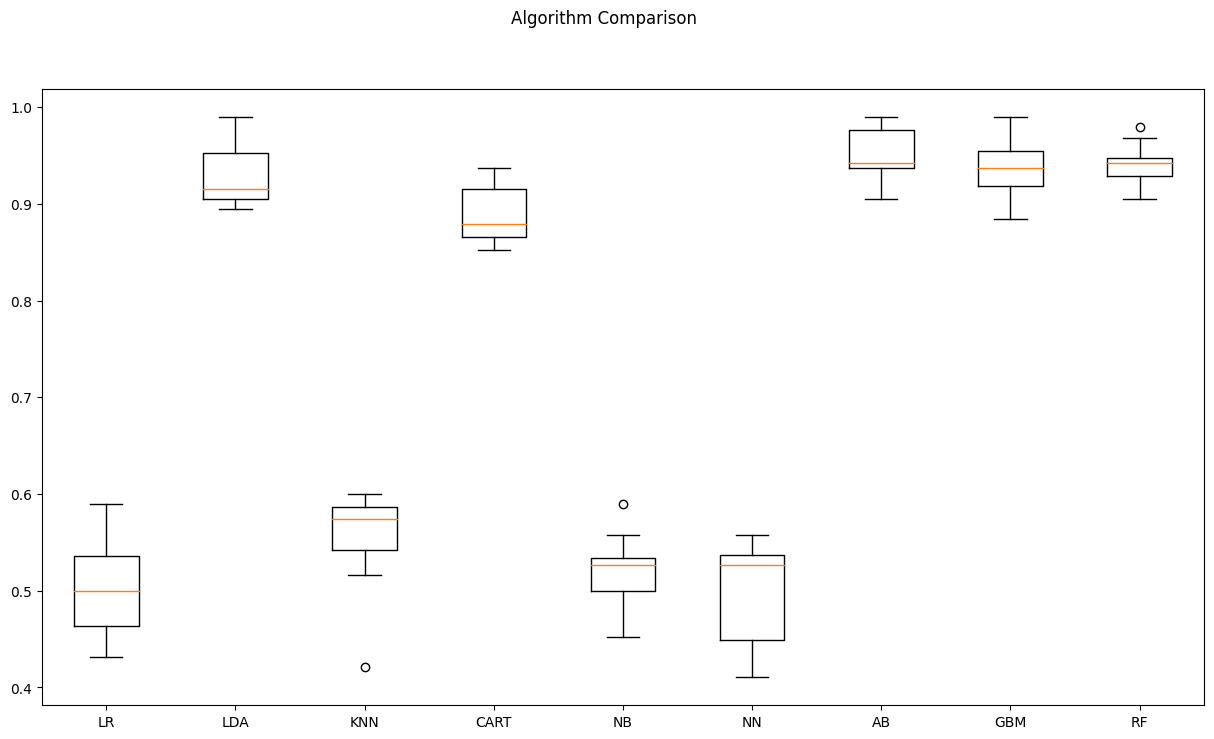

In [165]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

## Adaboost parameter grid

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Define hyperparameters to test
n_estimators = [50, 100, 150]
learning_rate = [0.01, 0.1, 1.0]
base_estimator = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, base_estimator=base_estimator)


In [167]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)


In [168]:
# Initialize AdaBoost model
model = AdaBoostClassifier()

# Set up cross-validation with 10 folds
kfold = KFold(n_splits=10)

# Configure GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


In [169]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print all results for each combination
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.970493 using {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 150}
0.869351 (0.022597) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}
0.869351 (0.022597) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 100}
0.869362 (0.025329) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 150}
0.890414 (0.028698) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 50}
0.906226 (0.027999) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 100}
0.916753 (0.026405) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 150}
0.952553 (0.027222) with: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 50}
0.965

## Finalize the model

In [173]:
#prepare the model

model = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=2), learning_rate= 0.1, n_estimators= 150)

model.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=150)

In [174]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9705882352941176
[[125   2]
 [  5 106]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       127
         1.0       0.98      0.95      0.97       111

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238



Text(0.5, 0, 'Variable Importance')

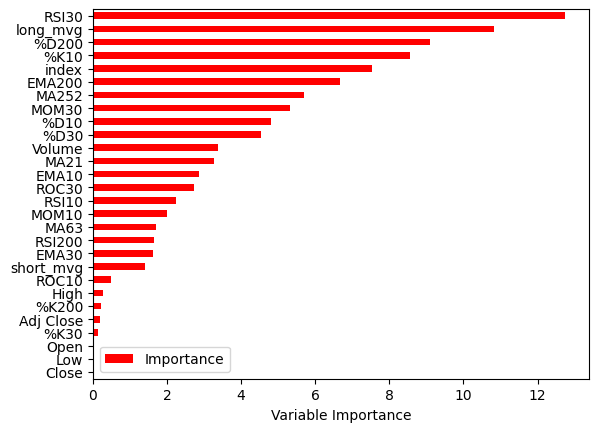

In [176]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

<Axes: >

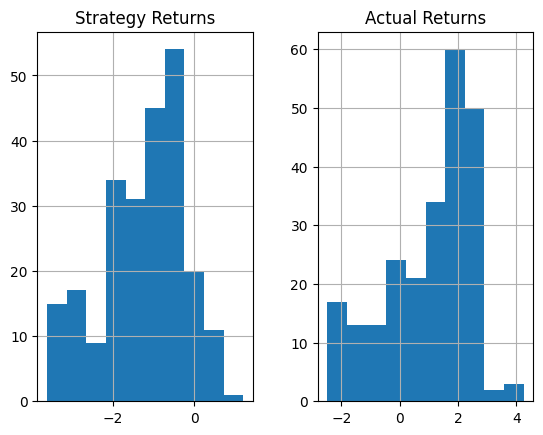

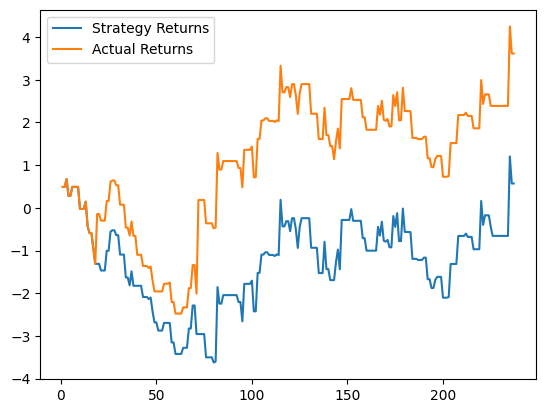

In [178]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()